**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from scipy import stats
from mlxtend.data import loadlocal_mnist
from sklearn.metrics import pairwise_distances
%load_ext pycodestyle_magic

In [3]:
#%%pycodestyle 
#закоментил потому что постоянно вылазит ошибка с последней поседне строкой
#все остальные требования PEP8 выполнены


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        X=X.astype(float)
        self.x_train = np.array(X).astype(float)
        self.y_train = np.array(y)
        self.n_classes = np.shape(np.unique(self.y_train))[0]
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.x_train, leaf_size=60)

    def predict(self, X):
        X=X.astype(float)
        if self.algorithm == 'brute':
            distance = pairwise_distances(X=X, Y=self.x_train)
            index = np.argpartition(distance,
                                    self.neighbors)[:, :self.neighbors]
        if self.algorithm == 'kd_tree':
            dist, index = self.tree.query(X, k=self.neighbors)
        predict = self.y_train[index]
        return stats.mode(predict.T)[0].reshape(-1)

    def predict_proba(self, X):
        X=X.astype(float)
        if self.algorithm == 'brute':
            distance = pairwise_distances(X=X, Y=self.x_train)
            index = np.argpartition(distance,
                                    self.neighbors)[:, :self.neighbors]
        if self.algorithm == 'kd_tree':
            dist, index = self.tree.query(X, k=self.neighbors)
        predict = np.zeros((X.shape[0], self.n_classes))
        for i in range(index.shape[0]):
            for j in index[i]:
                predict[i][int(self.y_train[j])] += 1
        return predict / self.neighbors

    def score(self, X, y):
        y_pred = self.predict(X)
        return float((y_pred == y).sum() / y.shape[0])


**IRIS**

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [7]:
%time clf.fit(X_train, y_train)

Wall time: 1.99 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [8]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [9]:
%time clf.predict(X_test)

Wall time: 989 µs


array([0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1])

In [10]:
%time my_clf.predict(X_test)

Wall time: 369 ms


array([0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1])

In [11]:
%time clf.predict_proba(X_test)

Wall time: 998 µs


array([[1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ]])

In [12]:
%time my_clf.predict_proba(X_test)

Wall time: 998 µs


array([[1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ]])

In [13]:
clf.score(X_test, y_test)

0.8666666666666667

In [14]:
my_clf.score(X_test, y_test)

0.8666666666666667

Задание 3

Best number of neighbours: 17


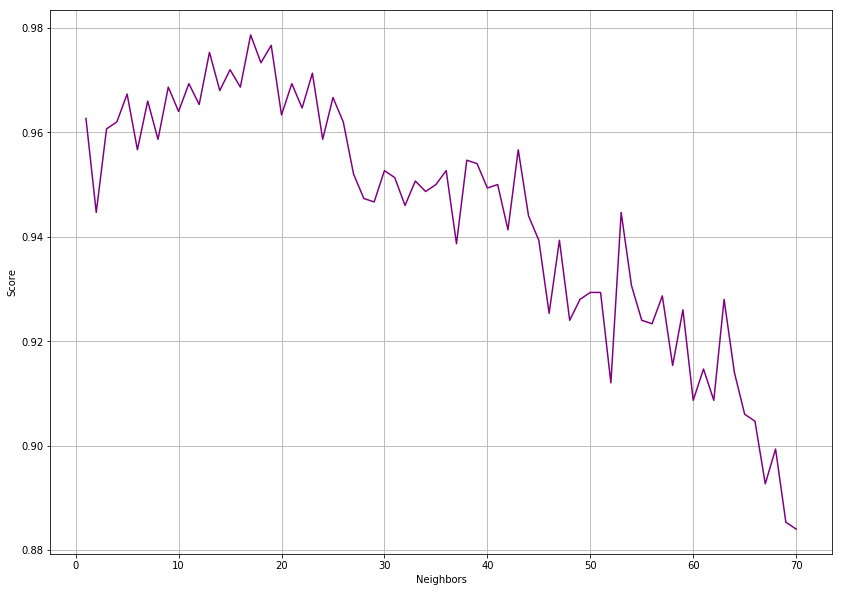

In [15]:
n_neighbours = 70
n_test = 100
scores = []

for i in range(1, n_neighbours + 1):
    testing_scores = []
    for j in range(n_test):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                            test_size = 0.1, stratify = iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors = i)
        my_clf.fit(X_train, y_train)
        testing_scores.append(my_clf.score(X_test, y_test))
    scores.append(np.mean(testing_scores))

best = np.argmax(scores) + 1
print("Best number of neighbours:", best)

plt.figure(figsize=(14,10))
plt.plot(list(range(1, n_neighbours + 1)), scores, color='purple')
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.grid()
plt.show()

**MNIST**

In [16]:
#mnist = fetch_mldata('MNIST original')
#так как это не работает, выполняю указания Всеволода - скачиваю новый mnist

In [17]:
#X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)
X_train, y_train = loadlocal_mnist(
        images_path=r'C:\Users\petro\Desktop\mnist\train-images.idx3-ubyte', 
        labels_path=r'C:\Users\petro\Desktop\mnist\train-labels.idx1-ubyte')
X_test, y_test = loadlocal_mnist(
        images_path=r'C:\Users\petro\Desktop\mnist\t10k-images.idx3-ubyte', 
        labels_path=r'C:\Users\petro\Desktop\mnist\t10k-labels.idx1-ubyte')

In [18]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [19]:
%time clf.fit(X_train, y_train)

Wall time: 5.99 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [21]:
%time my_clf.fit(X_train, y_train)

Wall time: 498 ms


In [22]:
%time clf.predict(X_test)

Wall time: 23.2 s


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [23]:
%time my_clf.predict(X_test)

Wall time: 36 s


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [24]:
%time clf.predict_proba(X_test)

Wall time: 24 s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
%time my_clf.predict_proba(X_test)

Wall time: 31.3 s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
clf.score(X_test, y_test)

0.9627

In [27]:
my_clf.score(X_test, y_test)

0.9627

Задание 4

In [28]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [29]:
#X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)
X_train, y_train = loadlocal_mnist(
        images_path=r'C:\Users\petro\Desktop\mnist\train-images.idx3-ubyte', 
        labels_path=r'C:\Users\petro\Desktop\mnist\train-labels.idx1-ubyte')
X_test, y_test = loadlocal_mnist(
        images_path=r'C:\Users\petro\Desktop\mnist\t10k-images.idx3-ubyte', 
        labels_path=r'C:\Users\petro\Desktop\mnist\t10k-labels.idx1-ubyte')

In [30]:
%time clf.fit(X_train, y_train)

Wall time: 29.4 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [31]:
%time my_clf.fit(X_train, y_train)

Wall time: 30.1 s


In [32]:
%time clf.predict(X_test)

Wall time: 13min 55s


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [33]:
%time my_clf.predict(X_test)

Wall time: 12min 14s


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [34]:
%time clf.predict_proba(X_test)

Wall time: 13min 39s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
%time my_clf.predict_proba(X_test)

Wall time: 12min 18s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
clf.score(X_test, y_test)

0.9627

In [37]:
my_clf.score(X_test, y_test)

0.9627

Задание 5

In [38]:
# seaborn - библиотека предназначенная для визуализации данных, реализована на matplotlib.
# matplotlib - библиотека для визуализации данных с помощью разных видов графиков.
# train_test_split - метод, который разбирает выборку на обучающую и тестовую части.
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - последовательно применяет список приобразованний данных.
# StandardScaler (from sklearn.preprocessing import StandardScaler) - стандартизирует данные (приводит среднее к 0,
# а дисперсию к 1).
# ClassifierMixin - базовый класс из которого наследуются все остальные классификаторы из sklearn.
# NeighborsBase - базовый класс для kNN.
# KNeighborsMixin - класс, содержащий в себе функцию для поиска k ближайщих соседей.
# SupervisedIntegerMixin - класс, с реализацией метода fit.